<a href="https://colab.research.google.com/github/honeybeat1/10minutes2pandas/blob/master/n421a_text_preprocessing_for_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Text Preprocessing for NLP

Women's E-Commerce Clothing Reviews
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

이번 과제의 목표는: 캐글 옷 리뷰 데이터의 텍스트 칼럼(`Review Text`)에서 토큰(단어)를 추출하고 추천(`Recommended IND`)을 할지(1) 안 할지(0)에 따른 토큰의 빈도를 살펴 보는 것 입니다.

토큰을 분리하기 위해 사용 가능한 정제기술을 모두 사용하고 특히
- Lemmatization
- 확장된 불용어 처리
기술을 잘 활용해 보세요

토큰이 만들어지면 꼭 **올바른 토큰화**를 잘 만족하는지 확인 합니다. 그리고 결과를 분석하여 어떤 특성이 추천에 이르게 하는지 그래프로 설명하세요. 마크다운 셀을 최대한 활용하여 결과를 분석해 보시기 바랍니다.

### 1) Spacy 코스를 수강하세요
- chapter1의 1~5 강좌 수강 (https://course.spacy.io/en/)
  - 챕터 1, 2, 3, 4, 5를 수강하는 것은 아닙니다!
- 문항 1) chapter1-5의 강의를 들으시고, 해당 제목을 입력하시오.

- 답 : Statistical models
- https://velog.io/@honeybeat1/NLP-spaCy-course-note 정리

In [ ]:
import pandas as pd

df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates
1,1,1080,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses
2,2,1077,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses
3,3,1049,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants
4,4,847,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses


In [ ]:
# 목표 : 데이터의 텍스트 칼럼(Review Text)에서 토큰(단어)를 추출하고 
# 추천(Recommended IND)을 할지(1) 안 할지(0)에 따른 토큰의 빈도를 살펴 보는 것
# 필요한 데이터
df_rev = df[['Review Text', 'Recommended IND']]
df_rev['Review Text'] = df_rev['Review Text'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_rev

### 2) 토큰을 정제합니다. 
- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거

- 문항 2-1) 소문자로 변경하는 함수를 입력하시오. 
- 문항 2-2) re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하시오. 

In [ ]:
# 문자를 소문자로 통일
df_rev['Review Text'] = df_rev['Review Text'].apply(lambda x: x.lower())

In [ ]:
df_rev['Review Text']

In [ ]:
# 분석에 관련없는 정보 제거
# 알파벳 소문자, 숫자만 받을 수 있는 코드

import re

regex = r"[^a-z0-9 ]" # 규칙 #a-z, 0-9, 빈칸 에 포함되지 않는 모든 것 #빈칸 꼭 남기기
subst = "" # 치환할 문자 (없애겠다)

result = re.sub(regex, subst, df_rev['Review Text'][0]).split()
result

['bsolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable']

In [ ]:
# 토큰화 함수 만들기

def tokenize(text):
    result = text.lower()
    result = re.sub(regex, subst, result).split()
    return result

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
df_rev['Review Text'] = df_rev['Review Text'].apply(tokenize)

### 3) 정제한 토큰을 시각화 합니다.
- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화 합니다.
- 추천(recommended_ind)/비추천에 따라 비교되는 토큰을 시각화 합니다.
- 문항 3) 추천 토큰 순위 10개 단어를 입력하시오.

In [ ]:
from collections import Counter # 리스트 형태의 데이터를 입력받아서 update를 통해 sum하기

word_counts = Counter()

word_counts.update(df_rev['Review Text'][0])

In [ ]:
word_counts

Counter({'absolutely': 1,
         'wonderful': 1,
         'silky': 1,
         'and': 2,
         'sexy': 1,
         'comfortable': 1})

In [ ]:
# top 10 토큰

df_rev['Review Text'].apply(lambda x:word_counts.update(x))
word_counts.most_common(10)

[('the', 65521),
 ('i', 50503),
 ('and', 42314),
 ('a', 37130),
 ('it', 36601),
 ('is', 26507),
 ('this', 22179),
 ('to', 21175),
 ('in', 17791),
 ('but', 14145)]

In [ ]:
# 토큰의 수
print("토큰의 수:", len(word_counts.most_common()))

# 토큰 순위에 따른 퍼센트 누적 분포
token_df = pd.DataFrame(columns=['word', 'count'])

word, count = [], []

for i in word_counts.most_common():
    word.append(i[0])
    count.append(i[1])
    
token_df['word'] = word
token_df['count'] = count

total = token_df['count'].sum()
token_df['percentage'] = token_df['count'].apply(lambda x:x/total)
token_df['cumsum'] = token_df['percentage'].cumsum()
token_df['rank'] = token_df.index + 1

토큰의 수: 19392


In [ ]:
token_df

,word,count,percentage,cumsum,rank
0,the,75568,5.573005e-02,0.055730,1
1,i,58428,4.308961e-02,0.098820,2
2,and,48807,3.599429e-02,0.134814,3
3,a,42776,3.154654e-02,0.166360,4
4,it,42325,3.121393e-02,0.197574,5
...,...,...,...,...,...
21073,bottomi,1,7.374822e-07,0.999997,21074
21074,small27p,1,7.374822e-07,0.999998,21075
21075,blaring,1,7.374822e-07,0.999999,21076
21076,sleevesnot,1,7.374822e-07,0.999999,21077


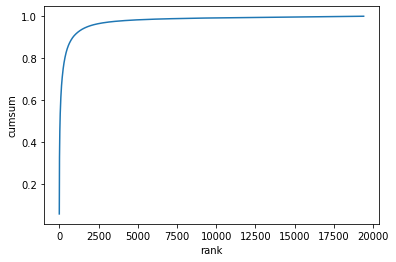

In [ ]:
import seaborn as sns

# 누적분포그래프(CDF)
sns.lineplot(x='rank', y='cumsum', data=token_df);

In [ ]:
# 추천, 비추천에 따라 비교되는 토큰 시각화

# 추천하는 리뷰만
df_rec = df_rev[df_rev['Recommended IND'] == 1]

In [ ]:
# 토큰 시각화를 위한 함수

def token_df(word_counts):

    token_df = pd.DataFrame(columns=['word', 'count'])

    word, count = [], []

    for i in word_counts.most_common():
        word.append(i[0])
        count.append(i[1])
    
    token_df['word'] = word
    token_df['count'] = count

    total = token_df['count'].sum()
    token_df['percentage'] = token_df['count'].apply(lambda x:x/total)
    token_df['cumsum'] = token_df['percentage'].cumsum()
    token_df['rank'] = token_df.index + 1
    return (token_df)

In [ ]:
# 추천하는 리뷰
word_counts_rec = Counter()

df_rec['Review Text'].apply(lambda x:word_counts_rec.update(x))
token_rec = token_df(word_counts_rec)
token_rec

,word,count,percentage,cumsum,rank
0,the,51536,0.054042,0.054042,1
1,i,41243,0.043249,0.097291,2
2,and,35147,0.036856,0.134147,3
3,a,31189,0.032706,0.166853,4
4,it,29234,0.030656,0.197509,5
...,...,...,...,...,...
17044,duper,1,0.000001,0.999996,17045
17045,retailerwear,1,0.000001,0.999997,17046
17046,missouri,1,0.000001,0.999998,17047
17047,heats,1,0.000001,0.999999,17048


In [ ]:
token_rec[:10]

,word,count,percentage,cumsum,rank
0,the,51536,0.054042,0.054042,1
1,i,41243,0.043249,0.097291,2
2,and,35147,0.036856,0.134147,3
3,a,31189,0.032706,0.166853,4
4,it,29234,0.030656,0.197509,5
5,is,22320,0.023406,0.220915,6
6,this,17972,0.018846,0.239761,7
7,to,17214,0.018051,0.257812,8
8,in,14506,0.015211,0.273023,9
9,but,11068,0.011606,0.284630,10


In [ ]:
# 추천하지 않는 리뷰

word_counts_norec = Counter()
df_norec = df_rev[df_rev['Recommended IND'] == 0]
df_norec['Review Text'].apply(lambda x:word_counts_norec.update(x))
token_norec = token_df(word_counts_norec)
token_norec

,word,count,percentage,cumsum,rank
0,the,13985,0.063498,0.063498,1
1,i,9260,0.042044,0.105543,2
2,it,7367,0.033449,0.138992,3
3,and,7165,0.032532,0.171524,4
4,a,5941,0.026975,0.198499,5
...,...,...,...,...,...
7863,staplebut,1,0.000005,0.999982,7864
7864,rush,1,0.000005,0.999986,7865
7865,hug,1,0.000005,0.999991,7866
7866,theoryended,1,0.000005,0.999995,7867


In [ ]:
!pip3 install squarify

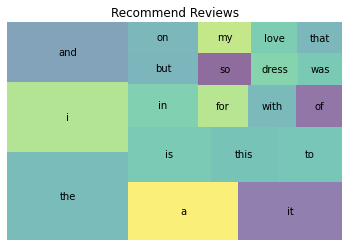

In [ ]:
import squarify
import matplotlib.pyplot as plt

color=['viridis']

wc_top20 = token_rec[token_rec['rank'] <= 20]
squarify.plot(sizes=wc_top20['percentage'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.title("Recommend Reviews")
plt.show()

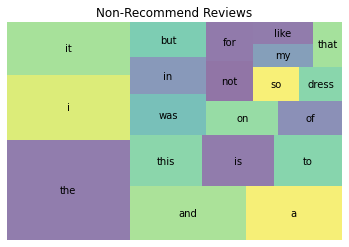

In [ ]:
wc_top20 = token_norec[token_norec['rank'] <= 20]
squarify.plot(sizes=wc_top20['percentage'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.title("Non-Recommend Reviews")
plt.show()

- 별 차이 없으므로, 불용어 사전을 사용해 토큰 정제후 다시 그리기

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.

- 문항 4) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하시오.

In [ ]:
!python3 -m spacy download en_core_web_sm

In [ ]:
# spacy 사용해보기
import spacy
from spacy.tokenizer import Tokenizer
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [ ]:
rec = df[df['Recommended IND'] == 1]
norec = df[df['Recommended IND'] == 0]

In [ ]:
rec['Review Text'] = rec['Review Text'].astype(str)
norec['Review Text'] = norec['Review Text'].astype(str)

In [ ]:
tokenizer = Tokenizer(nlp.vocab)

In [ ]:
def tokenize2(df):
  tokens = []
  # 토큰에서 불용어 제거, 소문자화 하여 업데이트
  for doc in tokenizer.pipe(df['Review Text']):
      doc_tokens = []

      # A doc is a sequence of Token(<class 'spacy.tokens.doc.Doc'>)
      for token in doc:
          # 토큰이 불용어와 구두점이 아니면 저장
          if (token.is_stop == False) & (token.is_punct == False):
              doc_tokens.append(token.text.lower())

      tokens.append(doc_tokens)

  df['tokens'] = tokens

In [ ]:
tokenize2(rec)
tokenize2(norec)

In [ ]:
rec['tokens']

0        [absolutely, wonderful, silky, sexy, comfortable]
1        [love, dress!,  , it's, sooo, pretty.,  , happ...
3        [love,, love,, love, jumpsuit., it's, fun,, fl...
4        [shirt, flattering, adjustable, tie., perfect,...
6        [aded, basket, hte, mintue, look, like, person...
                               ...                        
20325    [jeans, great, summer,, great, high, waist, fi...
20327    [normally, don't, care, rayon, clothing, fabri...
20328    [teacher,, it's, great, able, find, dresses, m...
20329    [bought, black, love, it., bought, medium, lar...
20330    [absolutely, love, blouse!, it's, easily, favo...
Name: tokens, Length: 16705, dtype: object

In [ ]:
# 추천하는 리뷰
word_counts_rec = Counter()

rec['tokens'].apply(lambda x:word_counts_rec.update(x))
token_rec = token_df(word_counts_rec)
token_rec

,word,count,percentage,cumsum,rank
0,love,6478,0.014383,0.014383,1
1,dress,5509,0.012231,0.026614,2
2,size,5036,0.011181,0.037795,3
3,it's,4615,0.010246,0.048041,4
4,wear,4544,0.010089,0.058130,5
...,...,...,...,...,...
30025,retailer-wear,1,0.000002,0.999991,30026
30026,missouri,1,0.000002,0.999993,30027
30027,heats,1,0.000002,0.999996,30028
30028,"prone,",1,0.000002,0.999998,30029


In [ ]:
token_rec[:10]

,word,count,percentage,cumsum,rank
0,love,6478,0.014383,0.014383,1
1,dress,5509,0.012231,0.026614,2
2,size,5036,0.011181,0.037795,3
3,it's,4615,0.010246,0.048041,4
4,wear,4544,0.010089,0.058130,5
5,like,4364,0.009689,0.067819,6
6,fit,4186,0.009294,0.077112,7
7,i'm,4049,0.008990,0.086102,8
8,great,3858,0.008566,0.094668,9
9,little,2899,0.006436,0.101104,10


In [ ]:
# 추천하지 않는 리뷰

word_counts_norec = Counter()

norec['tokens'].apply(lambda x:word_counts_norec.update(x))
token_norec = token_df(word_counts_norec)
token_norec

,word,count,percentage,cumsum,rank
0,like,1479,0.014854,0.014854,1
1,dress,1293,0.012986,0.027839,2
2,fit,961,0.009651,0.037491,3
3,fabric,852,0.008557,0.046048,4
4,it's,841,0.008446,0.054494,5
...,...,...,...,...,...
12775,taste,1,0.000010,0.999960,12776
12776,"cuter,",1,0.000010,0.999970,12777
12777,"compliments,",1,0.000010,0.999980,12778
12778,compliment,1,0.000010,0.999990,12779


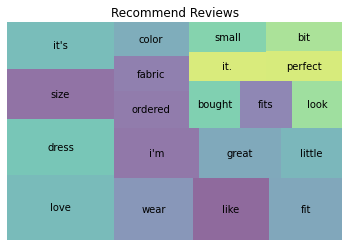

In [ ]:
wc_top20 = token_rec[token_rec['rank'] <= 20]
squarify.plot(sizes=wc_top20['percentage'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.title("Recommend Reviews")
plt.show()

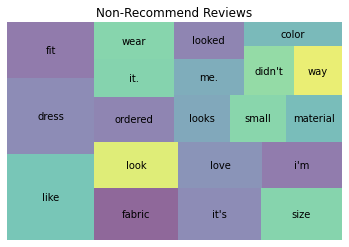

In [ ]:
wc_top20 = token_norec[token_norec['rank'] <= 20]
squarify.plot(sizes=wc_top20['percentage'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.title("Non-Recommend Reviews")
plt.show()

### 5) 통계적 트리밍 사용 전/후 토큰 분포를 비교합니다.
- 문서 등장 비율이 20% 미만이고, 최소 1% 이상 등장하는 단어만 선택한 뒤,
- 통계적 트리밍 사용 전/후 토큰 분포 시각화하고,
- 문항 5-1) 통계적 트리밍 후 상위 토큰 10개의 단어를 입력하시오.
- 문항 5-2) 불용어 처리 & 통계적 트리밍 후 상위 토큰 10개의 단어를 입력하시오.

In [ ]:
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [ ]:
df['Review Text'] = df['Review Text'].astype(str)

In [ ]:
tokenize2(df)

In [ ]:
wc = word_count(df['tokens'])

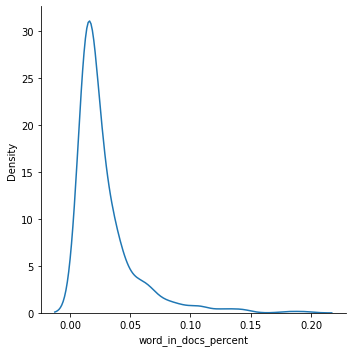

In [ ]:
# 최대 20% 미만, 최소 1% 이상 문서에 나타나는 단어들만 선택합니다.

wc = wc[(wc['word_in_docs_percent'] < 0.2) & (wc['word_in_docs_percent'] >= 0.01)]

sns.displot(wc['word_in_docs_percent'], kind='kde');

In [ ]:
for i in wc['word'][:10]:
  print(i)

i'm
great
ordered
fabric
little
look
color
it.
small
bought


In [ ]:
# 불용어 처리 한 후
wc = word_count(rec['tokens'])

In [ ]:
wc

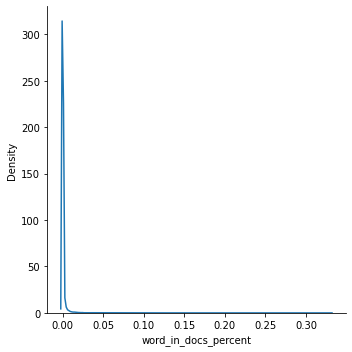

In [ ]:
# 문서에 나타나는 빈도
sns.displot(wc['word_in_docs_percent'],kind='kde');

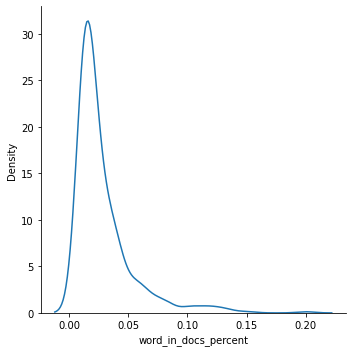

In [ ]:
# 최대 20% 미만, 최소 1% 이상 문서에 나타나는 단어들만 선택합니다.

wc = wc[(wc['word_in_docs_percent'] < 0.2) & (wc['word_in_docs_percent'] >= 0.01)]

sns.displot(wc['word_in_docs_percent'], kind='kde');

In [ ]:
wc

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
13,love,5508,6478,1.0,0.014383,0.014383,0.329722
165,dress,3561,5509,2.0,0.012231,0.026614,0.213170
61,size,3895,5036,3.0,0.011181,0.037795,0.233164
12,it's,3441,4615,4.0,0.010246,0.048041,0.205986
36,wear,3925,4544,5.0,0.010089,0.058130,0.234960
...,...,...,...,...,...,...,...
30025,retailer-wear,1,1,30026.0,0.000002,0.999991,0.000060
30028,missouri,1,1,30027.0,0.000002,0.999993,0.000060
30029,heats,1,1,30028.0,0.000002,0.999996,0.000060
30026,"prone,",1,1,30029.0,0.000002,0.999998,0.000060


In [ ]:
for i in wc['word'][:10]:
  print(i)

love
dress
size
it's
wear
like
fit
i'm
great
little


### 6) Lemmatization 사용 효과를 분석해 봅니다.
- 문항 6-1) Stemming한 뒤 상위 10개 단어를 입력하시오.
- 문항 6-2) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하시오.

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

tokens = []
for doc in df['tokens']:
    doc_tokens = []
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df['stems'] = tokens

In [ ]:
# STEMMING 후 상위 10개
wc = word_count(df['stems'])

for i in wc['word'][:10]:
  print(i)

love
fit
dress
look
size
wear
like
it'
i'm
color


In [ ]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

df['lemmas'] = df['Review Text'].apply(get_lemmas)


In [ ]:
wc = word_count(df['lemmas'])
for i in wc['word'][:10]:
  print(i)

dress
fit
love
wear
size
look
like
color
great
small


### 도전과제🔥 
- Spacy 기능을 추가적으로 한 가지 사용해 봅니다.
- 다른 자연어 데이터셋을 이용해서 지금까지 배운 내용을 복습해 봅시다.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 